In [1]:
import keras
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow.keras.optimizers
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten,Dense
from tensorflow.keras.losses import SparseCategoricalCrossentropy

In [2]:
(xtrain,ytrain),(xtest,ytest)=keras.datasets.cifar10.load_data()

In [3]:
xtrain=xtrain/255
xtest=xtest/255

In [4]:
ytest

array([[3],
       [8],
       [8],
       ...,
       [5],
       [1],
       [7]], dtype=uint8)

In [5]:
xtest[0].shape

(32, 32, 3)

In [6]:
model=Sequential()
model.add(Flatten(input_shape=(32,32,3)))
model.add(Dense(130,activation='relu'))
model.add(Dense(100,activation='relu'))
model.add(Dense(150,activation='relu'))
model.add(Dense(90,activation='relu'))
model.add(Dense(100,activation='relu'))
model.add(Dense(10,activation='softmax'))

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 3072)              0         
                                                                 
 dense (Dense)               (None, 130)               399490    
                                                                 
 dense_1 (Dense)             (None, 100)               13100     
                                                                 
 dense_2 (Dense)             (None, 150)               15150     
                                                                 
 dense_3 (Dense)             (None, 90)                13590     
                                                                 
 dense_4 (Dense)             (None, 100)               9100      
                                                                 
 dense_5 (Dense)             (None, 10)                1

In [8]:
model.compile(optimizer='rmsprop',loss=SparseCategoricalCrossentropy(),metrics=['accuracy'])

In [9]:
hist=model.fit(xtrain,ytrain,epochs=25,validation_data=(xtest,ytest),batch_size=600)

Epoch 1/25
84/84 [==============================] - 4s 23ms/step - loss: 2.1941 - accuracy: 0.1863 - val_loss: 2.1516 - val_accuracy: 0.1871
Epoch 2/25
84/84 [==============================] - 1s 18ms/step - loss: 2.0094 - accuracy: 0.2688 - val_loss: 1.8943 - val_accuracy: 0.3320
Epoch 3/25
84/84 [==============================] - 1s 16ms/step - loss: 1.9127 - accuracy: 0.3125 - val_loss: 1.9274 - val_accuracy: 0.3037
Epoch 4/25
84/84 [==============================] - 1s 14ms/step - loss: 1.8539 - accuracy: 0.3306 - val_loss: 1.8152 - val_accuracy: 0.3433
Epoch 5/25
84/84 [==============================] - 1s 14ms/step - loss: 1.8088 - accuracy: 0.3478 - val_loss: 1.8439 - val_accuracy: 0.3413
Epoch 6/25
84/84 [==============================] - 1s 14ms/step - loss: 1.7786 - accuracy: 0.3599 - val_loss: 1.7087 - val_accuracy: 0.3840
Epoch 7/25
84/84 [==============================] - 1s 14ms/step - loss: 1.7408 - accuracy: 0.3723 - val_loss: 2.0318 - val_accuracy: 0.2961
Epoch 8/25
84

In [10]:
his=hist.history

In [11]:
his

{'loss': [2.1941401958465576,
  2.0093560218811035,
  1.912658452987671,
  1.8539113998413086,
  1.808810830116272,
  1.7786030769348145,
  1.7408268451690674,
  1.716740369796753,
  1.6888116598129272,
  1.6703675985336304,
  1.6373597383499146,
  1.622921109199524,
  1.6035815477371216,
  1.5860612392425537,
  1.5680842399597168,
  1.5540927648544312,
  1.5414485931396484,
  1.5245860815048218,
  1.5110176801681519,
  1.4992809295654297,
  1.4855717420578003,
  1.4742763042449951,
  1.4619965553283691,
  1.4512760639190674,
  1.4415615797042847],
 'accuracy': [0.18634000420570374,
  0.2687999904155731,
  0.3125399947166443,
  0.33059999346733093,
  0.3478200137615204,
  0.35989999771118164,
  0.37229999899864197,
  0.38238000869750977,
  0.3944399952888489,
  0.397599995136261,
  0.41152000427246094,
  0.417959988117218,
  0.4241800010204315,
  0.43290001153945923,
  0.4391399919986725,
  0.44275999069213867,
  0.44830000400543213,
  0.45416000485420227,
  0.4586600065231323,
  0.464

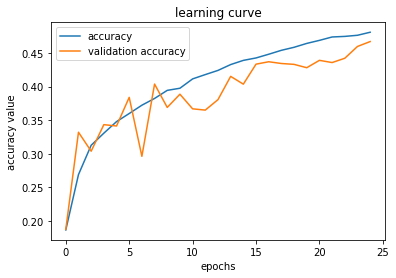

In [12]:
plt.plot(his['accuracy'],label='accuracy')
plt.plot(his['val_accuracy'],label='validation accuracy')
plt.xlabel('epochs')
plt.title('learning curve')
plt.ylabel('accuracy value')
plt.legend()

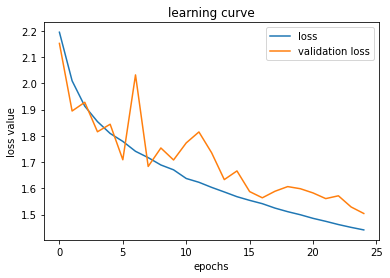

In [13]:
plt.plot(his['loss'],label='loss')
plt.plot(his['val_loss'],label='validation loss')
plt.xlabel('epochs')
plt.ylabel('loss value')
plt.title('learning curve')
plt.legend()

In [14]:
model.evaluate(xtest,ytest)

313/313 [==============================] - 1s 3ms/step - loss: 1.5041 - accuracy: 0.4672


[1.5041474103927612, 0.46720001101493835]